In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("full_df.csv")
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [4]:
img_dir = r'C:\Users\KIIT\Documents\Deep Learning\preprocessed_images'

In [5]:
df = df.iloc[:,1:7]
df.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy


In [6]:
s1 = df['Left-Diagnostic Keywords']

In [7]:
s1

0                                                cataract
1                                           normal fundus
2       laser spot，moderate non proliferative retinopathy
3                             macular epiretinal membrane
4                  moderate non proliferative retinopathy
                              ...                        
6387                  severe nonproliferative retinopathy
6388               moderate non proliferative retinopathy
6389                    mild nonproliferative retinopathy
6390                    mild nonproliferative retinopathy
6391    hypertensive retinopathy，age-related macular d...
Name: Left-Diagnostic Keywords, Length: 6392, dtype: object

In [8]:
age-related macular

SyntaxError: invalid syntax (<ipython-input-8-38ce1e4c874f>, line 1)

In [9]:
s2 = df['Right-Diagnostic Keywords']
s2

0                                           normal fundus
1                                           normal fundus
2                  moderate non proliferative retinopathy
3                       mild nonproliferative retinopathy
4                  moderate non proliferative retinopathy
                              ...                        
6387                   proliferative diabetic retinopathy
6388               moderate non proliferative retinopathy
6389                                        normal fundus
6390                    mild nonproliferative retinopathy
6391    hypertensive retinopathy，age-related macular d...
Name: Right-Diagnostic Keywords, Length: 6392, dtype: object

In [10]:
for i in range(6392):
    if 'age-related' in s1[i]:
        s1[i] = 'ARMD'

<ipython-input-10-f5cb57e1da7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1[i] = 'ARMD'


In [11]:
for i in range(6392):
    if 'age-related' in s2[i]:
        s2[i] = 'ARMD'

<ipython-input-11-9e422bbd12c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2[i] = 'ARMD'


In [14]:
df_left_arm = df[df['Left-Diagnostic Keywords'] == 'ARMD']
df_left_arm.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
34,35,Male,43_left.jpg,43_right.jpg,ARMD,ARMD
39,69,Female,48_left.jpg,48_right.jpg,ARMD,ARMD
44,65,Female,53_left.jpg,53_right.jpg,ARMD,ARMD
46,62,Male,55_left.jpg,55_right.jpg,ARMD,ARMD
85,73,Female,102_left.jpg,102_right.jpg,ARMD,ARMD


In [15]:
len(df_left_arm)

266

In [16]:
df_rt_arm = df[df['Right-Diagnostic Keywords'] == 'ARMD']
df_rt_arm.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
34,35,Male,43_left.jpg,43_right.jpg,ARMD,ARMD
39,69,Female,48_left.jpg,48_right.jpg,ARMD,ARMD
44,65,Female,53_left.jpg,53_right.jpg,ARMD,ARMD
46,62,Male,55_left.jpg,55_right.jpg,ARMD,ARMD
57,56,Female,71_left.jpg,71_right.jpg,diabetic retinopathy,ARMD


In [17]:
len(df_rt_arm)

285

In [18]:
df_arm_filenames = df_left_arm['Left-Fundus'].append(df_rt_arm['Right-Fundus'], ignore_index=True)
df_arm_filenames.head()

0     43_left.jpg
1     48_left.jpg
2     53_left.jpg
3     55_left.jpg
4    102_left.jpg
dtype: object

In [19]:
len(df_arm_filenames)

551

(512, 512, 3)
447_left.jpg


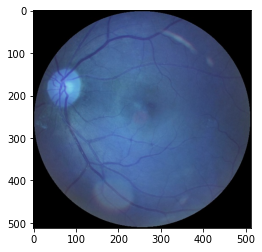

In [20]:
img = df_arm_filenames[34]
image = cv2.imread(os.path.join(img_dir, img))
plt.imshow(image)
print(image.shape)
print(img)

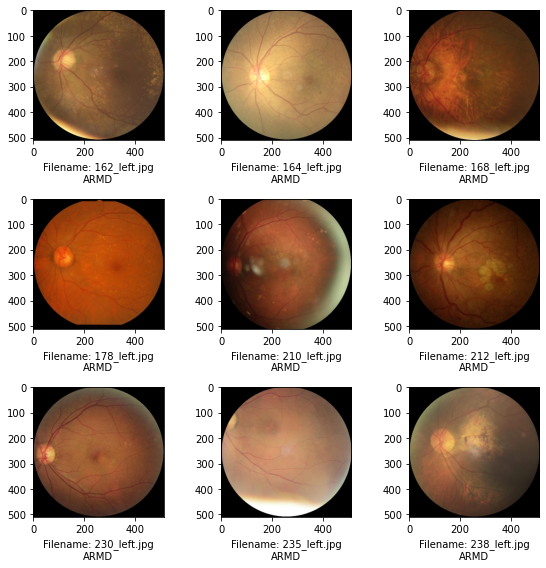

In [21]:
plt.figure(figsize=(8,8))
for i in range(9):
    img = df_arm_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''ARMD'.format(df_arm_filenames[i+9]))
    
plt.tight_layout()

In [22]:
df_left_nor = df[df['Left-Diagnostic Keywords'] == 'normal fundus']
df_left_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
8,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration
12,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane
13,50,Male,15_left.jpg,15_right.jpg,normal fundus,myelinated nerve fibers


In [23]:
df_rt_nor = df[df['Right-Diagnostic Keywords'] == 'normal fundus']
df_rt_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
9,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus
24,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus


In [24]:
df_nor_filenames = df_left_nor['Left-Fundus'].append(df_rt_nor['Right-Fundus'],ignore_index=True)
df_nor_filenames

0           1_left.jpg
1           8_left.jpg
2           9_left.jpg
3          14_left.jpg
4          15_left.jpg
             ...      
5496    4642_right.jpg
5497    4644_right.jpg
5498    4660_right.jpg
5499    4671_right.jpg
5500    4689_right.jpg
Length: 5501, dtype: object

In [25]:
len(df_nor_filenames)

5501

In [26]:
df_nor_filenames = df_nor_filenames.sample(551)
df_nor_filenames = df_nor_filenames.reset_index(drop=True)
df_nor_filenames.head()

0    2537_right.jpg
1     772_right.jpg
2       27_left.jpg
3    2817_right.jpg
4     3159_left.jpg
dtype: object

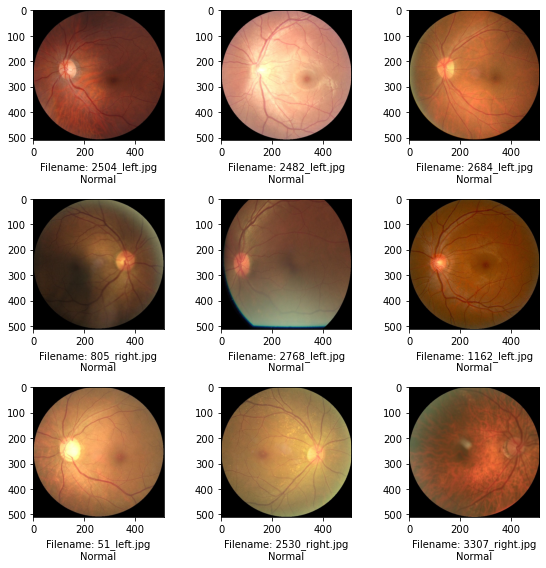

In [27]:
# Grid images of normal eye

plt.figure(figsize=(8,8))
for i in range(9):
    img = df_nor_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Normal'.format(df_nor_filenames[i+9]))
    
plt.tight_layout()

In [29]:
df_arm_filenames = pd.DataFrame(df_arm_filenames, columns = ["filename"])
df_arm_filenames["label"] = "ARMD"
df_arm_filenames.head()

,filename,label
0,43_left.jpg,ARMD
1,48_left.jpg,ARMD
2,53_left.jpg,ARMD
3,55_left.jpg,ARMD
4,102_left.jpg,ARMD


In [30]:
df_nor_filenames = pd.DataFrame(df_nor_filenames, columns = ["filename"])
df_nor_filenames["label"] = "normal"
df_nor_filenames.head()

,filename,label
0,2537_right.jpg,normal
1,772_right.jpg,normal
2,27_left.jpg,normal
3,2817_right.jpg,normal
4,3159_left.jpg,normal


In [31]:
df_combined = df_arm_filenames.append(df_nor_filenames,ignore_index = True)
df_combined

,filename,label
0,43_left.jpg,ARMD
1,48_left.jpg,ARMD
2,53_left.jpg,ARMD
3,55_left.jpg,ARMD
4,102_left.jpg,ARMD
...,...,...
1097,2628_right.jpg,normal
1098,2447_left.jpg,normal
1099,3940_left.jpg,normal
1100,4542_left.jpg,normal


In [32]:
df_combined = df_combined.sample(1102)
df_combined = df_combined.reset_index(drop=True)
df_combined

,filename,label
0,1879_left.jpg,ARMD
1,3416_left.jpg,normal
2,821_right.jpg,ARMD
3,3139_right.jpg,normal
4,1885_left.jpg,ARMD
...,...,...
1097,1817_left.jpg,ARMD
1098,2447_left.jpg,normal
1099,1458_left.jpg,ARMD
1100,1857_right.jpg,ARMD


In [33]:
a  = np.array(df_combined.filename)

In [34]:
a.shape

(1102,)

In [35]:
paths = []
type(paths)

list

In [36]:
for i in range(1102):
    img = a[i]
    image = os.path.join(img_dir, img)
    paths.append(image)

In [37]:
paths

['C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1879_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3416_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\821_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3139_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1885_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1873_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2374_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\977_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1845_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\53_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3979_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1125_left.jpg',
 'C:\\Users\\KII

In [38]:
len(paths)

1102

In [39]:
data = []

In [40]:
for i in range(1102):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,(224,224))
    data.append(image)
    

In [41]:
len(data)

1102

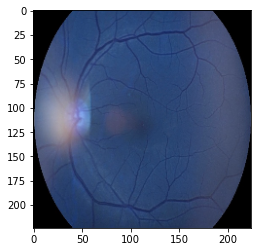

In [42]:
plt.imshow(data[231]/255)

In [43]:
type(data)

list

In [44]:
data = np.array(data)

In [45]:
type(data)

numpy.ndarray

## Scaling the data

In [46]:
data = data/255

In [47]:
x = data
y = []
for i in df_combined.label:
    if(i=='ARMD'):
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

In [48]:
len(x)

1102

In [49]:
len(y)

1102

## Splitting the data into train, test, val

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5)

print(len(x_train))
print(len(x_val))
print(len(x_test))

881
110
111


## Data Augmentation

In [51]:
from tensorflow.keras import layers

In [52]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [53]:
from tensorflow.keras.models import Sequential

In [54]:
num_classes = 2

model = models.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30)

Epoch 1/30


C:\Users\KIIT\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


28/28 [==============================] - 37s 1s/step - loss: 0.7220 - accuracy: 0.5062
Epoch 2/30
28/28 [==============================] - 36s 1s/step - loss: 0.6859 - accuracy: 0.5494
Epoch 3/30
28/28 [==============================] - 35s 1s/step - loss: 0.6833 - accuracy: 0.5528
Epoch 4/30
28/28 [==============================] - 35s 1s/step - loss: 0.6702 - accuracy: 0.5891
Epoch 5/30
28/28 [==============================] - 36s 1s/step - loss: 0.6660 - accuracy: 0.5823
Epoch 6/30
28/28 [==============================] - 36s 1s/step - loss: 0.6823 - accuracy: 0.5176
Epoch 7/30
28/28 [==============================] - 35s 1s/step - loss: 0.6501 - accuracy: 0.6039
Epoch 8/30
28/28 [==============================] - 35s 1s/step - loss: 0.6522 - accuracy: 0.6186
Epoch 9/30
28/28 [==============================] - 36s 1s/step - loss: 0.6583 - accuracy: 0.6005
Epoch 10/30
28/28 [==============================] - 35s 1s/step - loss: 0.6621 - accuracy: 0.5880
Epoch 11/30
28/28 [===========

In [55]:
model.evaluate(x_val,y_val)

4/4 [==============================] - 2s 273ms/step - loss: 0.6081 - accuracy: 0.6545


[0.6080535054206848, 0.6545454263687134]

In [56]:
y_pre = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:9]

[1, 1, 0, 0, 1, 1, 0, 1, 0]

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.64      0.71        64
           1       0.61      0.77      0.68        47

    accuracy                           0.69       111
   macro avg       0.70      0.70      0.69       111
weighted avg       0.71      0.69      0.70       111



# MobileNet V2 Model

In [60]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [61]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [62]:
num_of_classes = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [71]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=15)

Epoch 1/15
28/28 [==============================] - 29s 962ms/step - loss: 0.4014 - accuracy: 0.8252
Epoch 2/15
28/28 [==============================] - 27s 957ms/step - loss: 0.3695 - accuracy: 0.8468
Epoch 3/15
28/28 [==============================] - 27s 961ms/step - loss: 0.3543 - accuracy: 0.8468
Epoch 4/15
28/28 [==============================] - 27s 963ms/step - loss: 0.3321 - accuracy: 0.8751
Epoch 5/15
28/28 [==============================] - 27s 961ms/step - loss: 0.3199 - accuracy: 0.8865
Epoch 6/15
28/28 [==============================] - 27s 960ms/step - loss: 0.3138 - accuracy: 0.8740
Epoch 7/15
28/28 [==============================] - 27s 958ms/step - loss: 0.2979 - accuracy: 0.8967
Epoch 8/15
28/28 [==============================] - 27s 956ms/step - loss: 0.2871 - accuracy: 0.9069
Epoch 9/15
28/28 [==============================] - 27s 957ms/step - loss: 0.2782 - accuracy: 0.9069
Epoch 10/15
28/28 [==============================] - 27s 959ms/step - loss: 0.2829 - accura

In [72]:
model.evaluate(x_val,y_val)

4/4 [==============================] - 4s 803ms/step - loss: 0.3252 - accuracy: 0.8636


[0.3252486288547516, 0.8636363744735718]

In [73]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 3s 806ms/step - loss: 0.3312 - accuracy: 0.8739


[0.331199586391449, 0.8738738894462585]

In [74]:
y_pre = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[1, 1, 0, 0, 1, 1, 0, 1, 1, 1]

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.87      0.83      0.85        47

    accuracy                           0.87       111
   macro avg       0.87      0.87      0.87       111
weighted avg       0.87      0.87      0.87       111



# EfficientNet B4 Model

In [68]:
model1 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
                   trainable=False,input_shape=(224, 224, 3)),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [69]:
num_of_classes = 2

model1 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [70]:
model1.compile(
  optimizer="nadam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=5)

Epoch 1/5
28/28 [==============================] - 30s 959ms/step - loss: 0.7357 - accuracy: 0.5607
Epoch 2/5
28/28 [==============================] - 27s 956ms/step - loss: 0.5858 - accuracy: 0.6788
Epoch 3/5
28/28 [==============================] - 27s 959ms/step - loss: 0.5264 - accuracy: 0.7378
Epoch 4/5
28/28 [==============================] - 27s 950ms/step - loss: 0.4755 - accuracy: 0.7650
Epoch 5/5
28/28 [==============================] - 27s 954ms/step - loss: 0.4443 - accuracy: 0.7923


In [76]:
model1.evaluate(x_val,y_val)

4/4 [==============================] - 2s 380ms/step - loss: 0.4936 - accuracy: 0.7636


[0.49360111355781555, 0.7636363506317139]

# VGG-16 Model

In [77]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras import layers,models
from keras.layers import Flatten,Dense
from keras.models import Model

In [78]:
IMAGE_SIZE = [224,224]

In [79]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [80]:
for layers in vgg.layers:
    layers.trainable = False

In [81]:
x = Flatten()(vgg.output)

In [82]:
prediction = Dense(2,activation = 'softmax')(x)

In [83]:
model2 = Model(inputs = vgg.input, outputs = prediction) 

In [84]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [85]:
model2.compile(optimizer = 'nadam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [86]:
model2.fit(x_train,y_train,epochs=10)

Epoch 1/10


C:\Users\KIIT\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


28/28 [==============================] - 163s 6s/step - loss: 1.1032 - accuracy: 0.5210
Epoch 2/10
28/28 [==============================] - 205s 7s/step - loss: 0.8035 - accuracy: 0.5993
Epoch 3/10
28/28 [==============================] - 222s 8s/step - loss: 0.6811 - accuracy: 0.6833
Epoch 4/10
28/28 [==============================] - 227s 8s/step - loss: 0.7126 - accuracy: 0.6674
Epoch 5/10
28/28 [==============================] - 217s 8s/step - loss: 0.7198 - accuracy: 0.6300
Epoch 6/10
28/28 [==============================] - 212s 8s/step - loss: 0.5727 - accuracy: 0.7140
Epoch 7/10
28/28 [==============================] - 216s 8s/step - loss: 0.4758 - accuracy: 0.7605
Epoch 8/10
28/28 [==============================] - 218s 8s/step - loss: 0.5805 - accuracy: 0.7049
Epoch 9/10
28/28 [==============================] - 214s 8s/step - loss: 0.4755 - accuracy: 0.7616
Epoch 10/10
28/28 [==============================] - 213s 8s/step - loss: 0.5122 - accuracy: 0.7514


# Resnet50 Model

In [87]:
num_classes = 2
model2 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/classification/1",
                   trainable=False,input_shape=(224, 224, 3)),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [88]:
model2 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [94]:
model2.compile(
  optimizer="nadam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
28/28 [==============================] - 31s 991ms/step - loss: 0.3312 - accuracy: 0.8740
Epoch 2/10
28/28 [==============================] - 28s 984ms/step - loss: 0.3160 - accuracy: 0.8944
Epoch 3/10
28/28 [==============================] - 28s 987ms/step - loss: 0.3120 - accuracy: 0.8729
Epoch 4/10
28/28 [==============================] - 27s 977ms/step - loss: 0.2921 - accuracy: 0.9058
Epoch 5/10
28/28 [==============================] - 28s 986ms/step - loss: 0.2863 - accuracy: 0.9001
Epoch 6/10
28/28 [==============================] - 28s 988ms/step - loss: 0.2827 - accuracy: 0.9024
Epoch 7/10
28/28 [==============================] - 28s 990ms/step - loss: 0.2649 - accuracy: 0.9171
Epoch 8/10
28/28 [==============================] - 28s 987ms/step - loss: 0.2633 - accuracy: 0.9024
Epoch 9/10
28/28 [==============================] - 28s 995ms/step - loss: 0.2543 - accuracy: 0.9160
Epoch 10/10
28/28 [==============================] - 28s 994ms/step - loss: 0.2503 - accura

In [95]:
model2.evaluate(x_val,y_val)

4/4 [==============================] - 5s 829ms/step - loss: 0.3275 - accuracy: 0.8455


[0.32753366231918335, 0.8454545736312866]

In [96]:
model2.evaluate(x_test,y_test)

4/4 [==============================] - 4s 819ms/step - loss: 0.3307 - accuracy: 0.8378


[0.33071452379226685, 0.837837815284729]

NameError: name 'model2' is not defined

In [ ]:
print(classification_report(y_val,y_pred))